In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
IMG_SIZE = (224, 224)

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    "E:\Datasets\MURA XRAY\MURA-v1.1\Train_Hand",  
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='sparse',  # For integer labels
    shuffle=True
)
test_generator = test_datagen.flow_from_directory(
    "E:\\Datasets\\MURA XRAY\\MURA-v1.1\\Valid_Hand",  
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='sparse', 
    shuffle=False
)

Found 5537 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [5]:
from keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D

In [6]:
base_model = InceptionV3(weights='imagenet', include_top=False)

transfer_learning_arch = base_model.output
transfer_learning_arch = GlobalAveragePooling2D()(transfer_learning_arch)
transfer_learning_arch = Dense(1024, activation='relu')(transfer_learning_arch)
transfer_learning_arch = Dropout(0.4)(transfer_learning_arch)
predictions = Dense(2, activation='softmax')(transfer_learning_arch)

transfer_learning_model = Model(inputs=base_model.input, outputs=predictions)

In [7]:
transfer_learning_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

In [8]:
history = transfer_learning_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 667s 4s/step - accuracy: 0.6970 - loss: 2.0733 - val_accuracy: 0.5891 - val_loss: 949.1177
Epoch 2/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 597s 3s/step - accuracy: 0.7237 - loss: 0.6372 - val_accuracy: 0.5891 - val_loss: 15.4559
Epoch 3/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 637s 4s/step - accuracy: 0.7437 - loss: 0.5823 - val_accuracy: 0.5761 - val_loss: 0.7301
Epoch 4/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 661s 4s/step - accuracy: 0.7291 - loss: 0.5853 - val_accuracy: 0.5891 - val_loss: 0.7474
Epoch 5/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 642s 4s/step - accuracy: 0.7326 - loss: 0.5812 - val_accuracy: 0.5891 - val_loss: 0.7245
Epoch 6/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 654s 4s/step - accuracy: 0.7276 - loss: 0.5909 - val_accuracy: 0.5891 - val_loss: 0.7345
Epoch 7/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 681s 4s/step - accuracy: 0.7278 - loss: 0.6110 - val_accuracy: 0.5891 - val_loss: 0.7257
Epoch 8/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 642s 4s/step - accuracy: 0.7291 - loss: 0.6016 - val_a

In [9]:
from loglu import LogLU
from zengrad import ZenGrad

In [10]:
base_model = InceptionV3(weights='imagenet', include_top=False)

transfer_learning_arch = base_model.output
transfer_learning_arch = GlobalAveragePooling2D()(transfer_learning_arch)
transfer_learning_arch = Dense(1024, activation=LogLU())(transfer_learning_arch)
transfer_learning_arch = Dropout(0.4)(transfer_learning_arch)
predictions = Dense(2, activation='softmax')(transfer_learning_arch)

transfer_learning_model = Model(inputs=base_model.input, outputs=predictions)

In [11]:
transfer_learning_model.compile(optimizer=ZenGrad(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

In [12]:
history_loglu_zengrad = transfer_learning_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 660s 4s/step - accuracy: 0.6798 - loss: 0.6841 - val_accuracy: 0.6174 - val_loss: 0.6845
Epoch 2/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 614s 4s/step - accuracy: 0.7686 - loss: 0.5122 - val_accuracy: 0.6826 - val_loss: 0.6318
Epoch 3/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 607s 3s/step - accuracy: 0.7916 - loss: 0.4719 - val_accuracy: 0.6957 - val_loss: 0.6049
Epoch 4/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 607s 3s/step - accuracy: 0.8086 - loss: 0.4397 - val_accuracy: 0.7087 - val_loss: 0.6774
Epoch 5/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 610s 4s/step - accuracy: 0.8306 - loss: 0.4060 - val_accuracy: 0.7109 - val_loss: 0.6758
Epoch 6/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 598s 3s/step - accuracy: 0.8385 - loss: 0.3747 - val_accuracy: 0.6891 - val_loss: 0.6622
Epoch 7/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 603s 3s/step - accuracy: 0.8459 - loss: 0.3622 - val_accuracy: 0.7391 - val_loss: 0.6807
Epoch 8/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 609s 4s/step - accuracy: 0.8626 - loss: 0.3259 - val_accu

In [13]:
base_model = InceptionV3(weights='imagenet', include_top=False)

transfer_learning_arch = base_model.output
transfer_learning_arch = GlobalAveragePooling2D()(transfer_learning_arch)
transfer_learning_arch = Dense(1024, activation='softplus')(transfer_learning_arch)
transfer_learning_arch = Dropout(0.4)(transfer_learning_arch)
predictions = Dense(2, activation='softmax')(transfer_learning_arch)

transfer_learning_model = Model(inputs=base_model.input, outputs=predictions)

In [14]:
transfer_learning_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

In [15]:
history_softplus = transfer_learning_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 780s 4s/step - accuracy: 0.6239 - loss: 3.3273 - val_accuracy: 0.5826 - val_loss: 1.3179
Epoch 2/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 694s 4s/step - accuracy: 0.7115 - loss: 0.6284 - val_accuracy: 0.5891 - val_loss: 1.3831
Epoch 3/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 701s 4s/step - accuracy: 0.7332 - loss: 0.5961 - val_accuracy: 0.5891 - val_loss: 0.7641
Epoch 4/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 656s 4s/step - accuracy: 0.7343 - loss: 0.5887 - val_accuracy: 0.5891 - val_loss: 0.7230
Epoch 5/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 645s 4s/step - accuracy: 0.7262 - loss: 0.5899 - val_accuracy: 0.5891 - val_loss: 0.7465
Epoch 6/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 635s 4s/step - accuracy: 0.7375 - loss: 0.5772 - val_accuracy: 0.5891 - val_loss: 0.6914
Epoch 7/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 631s 4s/step - accuracy: 0.7266 - loss: 0.5870 - val_accuracy: 0.5891 - val_loss: 0.7212
Epoch 8/20
174/174 ━━━━━━━━━━━━━━━━━━━━ 631s 4s/step - accuracy: 0.7346 - loss: 0.5798 - val_accu

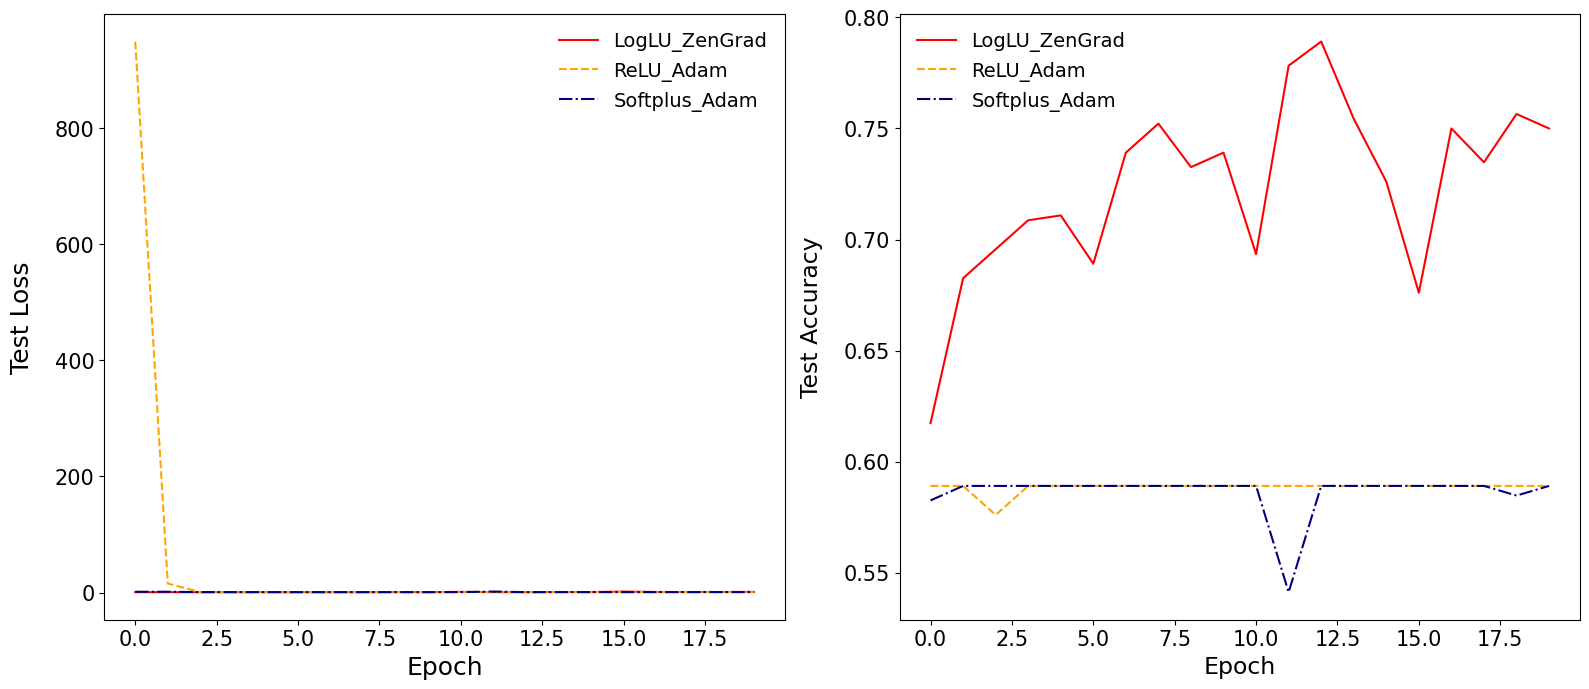

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
plt.plot(history_loglu_zengrad.history['val_loss'], label='LogLU_ZenGrad', color='red', linestyle='-')  
plt.plot(history.history['val_loss'], label='ReLU_Adam', color='orange', linestyle='--')  
plt.plot(history_softplus.history['val_loss'], label='Softplus_Adam', color='navy', linestyle='-.')  
plt.ylabel('Test Loss', fontsize=18, labelpad=15)
plt.xlabel('Epoch', fontsize=18)
plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Plot for Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_loglu_zengrad.history['val_accuracy'], label='LogLU_ZenGrad', color='red', linestyle='-')  
plt.plot(history.history['val_accuracy'], label='ReLU_Adam', color='orange', linestyle='--')  
plt.plot(history_softplus.history['val_accuracy'], label='Softplus_Adam', color='navy', linestyle='-.')  
plt.ylabel('Test Accuracy', fontsize=17, labelpad=15)
plt.xlabel('Epoch', fontsize=17)
plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

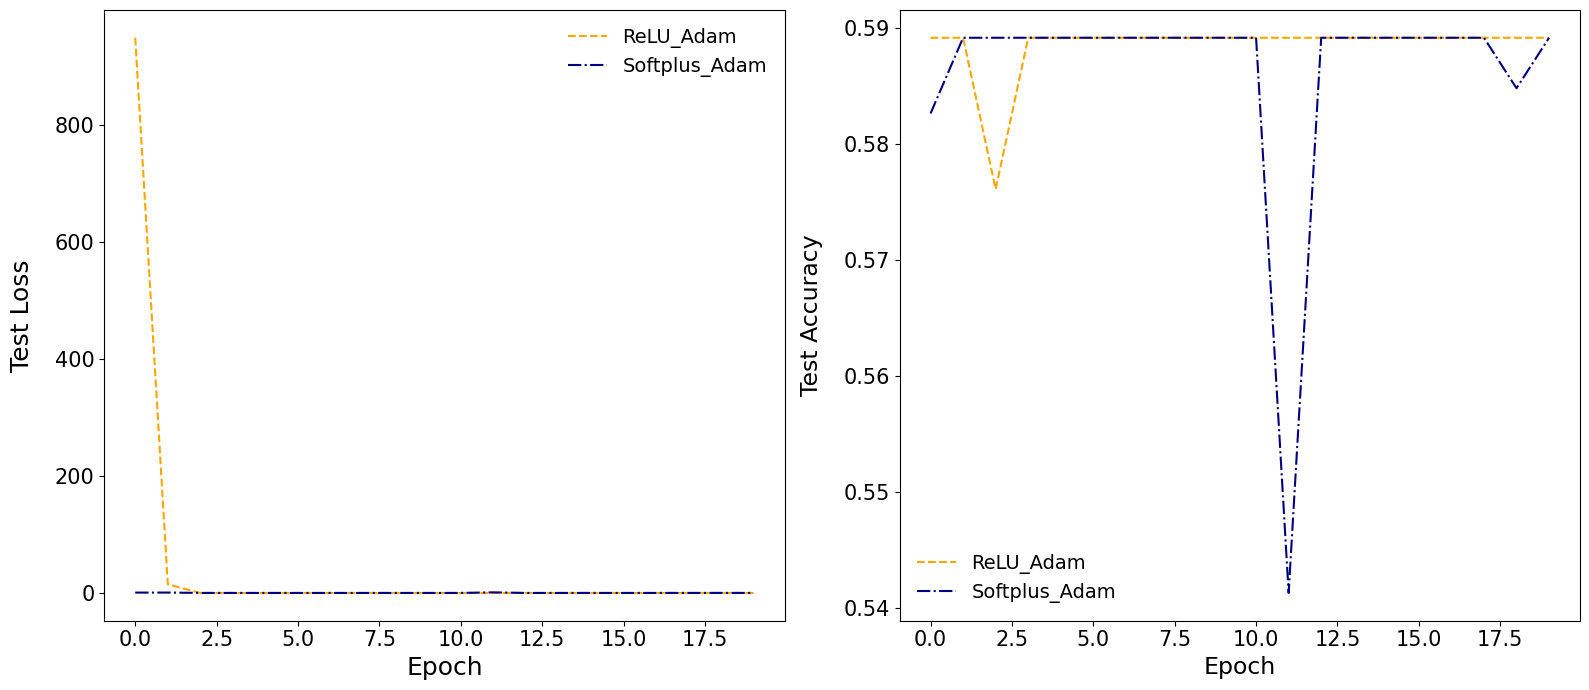

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
# plt.plot(history_loglu_zengrad.history['val_loss'], label='LogLU_ZenGrad', color='red', linestyle='-')  
plt.plot(history.history['val_loss'], label='ReLU_Adam', color='orange', linestyle='--')  
plt.plot(history_softplus.history['val_loss'], label='Softplus_Adam', color='navy', linestyle='-.')  
plt.ylabel('Test Loss', fontsize=18, labelpad=15)
plt.xlabel('Epoch', fontsize=18)
plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Plot for Validation Accuracy
plt.subplot(1, 2, 2)
# plt.plot(history_loglu_zengrad.history['val_accuracy'], label='LogLU_ZenGrad', color='red', linestyle='-')  
plt.plot(history.history['val_accuracy'], label='ReLU_Adam', color='orange', linestyle='--')  
plt.plot(history_softplus.history['val_accuracy'], label='Softplus_Adam', color='navy', linestyle='-.')  
plt.ylabel('Test Accuracy', fontsize=17, labelpad=15)
plt.xlabel('Epoch', fontsize=17)
plt.legend(fontsize=14, frameon=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()